In [1]:
import pyodbc
import pandas as pd
import numpy as np
import datetime as dt
from datetime import timedelta
from datetime import datetime
from datetime import date
import pickle
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as st
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.dates as dates


In [2]:
with open('Data.pickle','rb') as f:
    [dff,df2,frames] = pickle.load(f)

In [4]:
frames['M+3']

,Trade_Date,Vol80,Vol90,Vol95,Vol975,Vol100,Vol1025,Vol105,Vol110,Vol120
0,2015-01-02,52.97,47.97,45.92,44.98,44.45,43.99,43.65,43.21,43.10
1,2015-01-05,56.65,51.55,49.34,48.36,47.83,47.30,46.85,46.19,45.84
2,2015-01-06,55.89,50.52,48.54,47.55,47.03,46.38,45.80,45.08,45.11
3,2015-01-07,51.91,46.71,44.85,43.88,43.34,42.84,42.38,41.94,41.88
4,2015-01-08,49.93,45.16,43.34,42.36,41.79,41.31,40.95,40.59,40.51
...,...,...,...,...,...,...,...,...,...,...
1005,2018-11-26,61.59,56.09,53.65,52.45,51.27,50.10,48.90,46.63,44.16
1006,2018-11-27,58.73,52.32,49.95,48.90,47.87,46.74,45.58,44.00,42.70
1007,2018-11-28,60.51,53.70,51.00,49.76,48.64,47.64,46.77,45.67,45.64
1008,2018-11-29,62.24,55.62,53.21,52.10,51.16,50.44,49.88,49.05,49.46


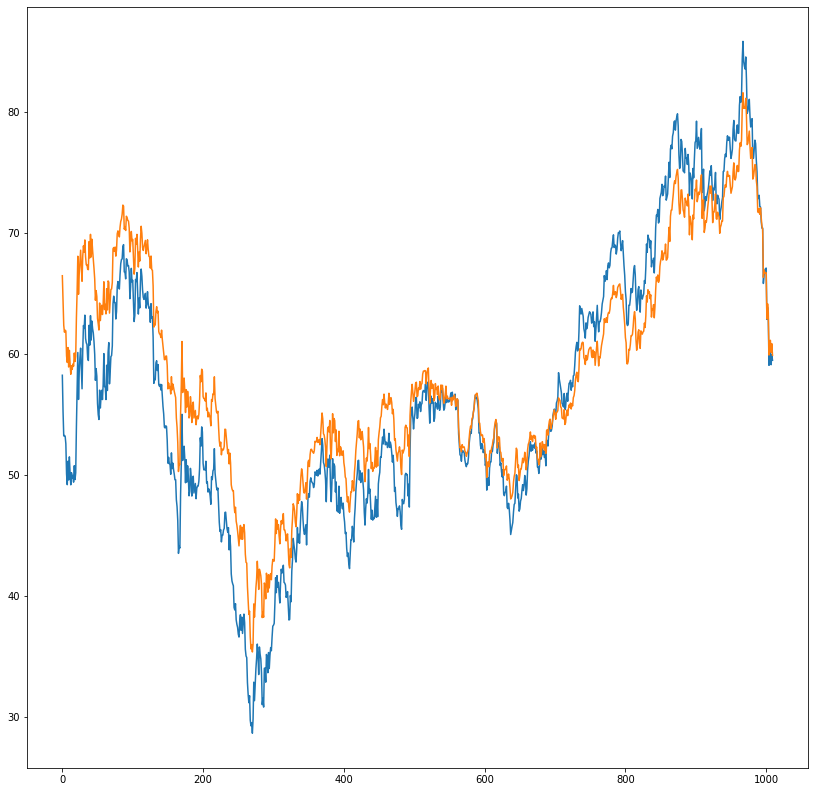

In [20]:
ax = plt.figure(figsize=(14, 14))
plt.plot(df2['M+3'])
plt.plot(df2['M+14'])


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2.4762  , p=0.1159  , df_denom=1006, df_num=1
ssr based chi2 test:   chi2=2.4836  , p=0.1150  , df=1
likelihood ratio test: chi2=2.4806  , p=0.1153  , df=1
parameter F test:         F=2.4762  , p=0.1159  , df_denom=1006, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.3343  , p=0.0134  , df_denom=1003, df_num=2
ssr based chi2 test:   chi2=8.7119  , p=0.0128  , df=2
likelihood ratio test: chi2=8.6745  , p=0.0131  , df=2
parameter F test:         F=4.3343  , p=0.0134  , df_denom=1003, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.7271  , p=0.0430  , df_denom=1000, df_num=3
ssr based chi2 test:   chi2=8.2387  , p=0.0413  , df=3
likelihood ratio test: chi2=8.2052  , p=0.0420  , df=3
parameter F test:         F=2.7271  , p=0.0430  , df_denom=1000, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7737  , p=0.

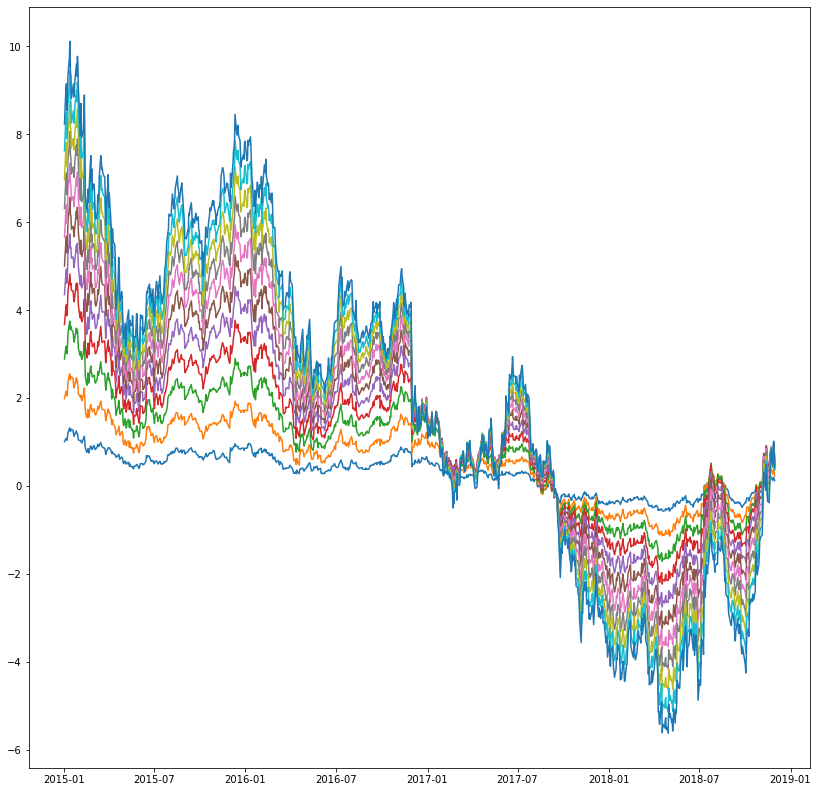

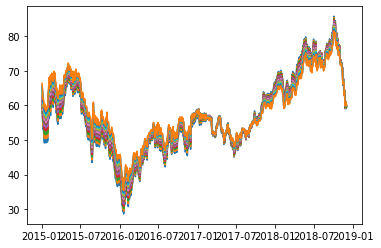

In [28]:
import pickle as pkl
N =np.size(df2,axis=0)
diff = np.zeros((N,11))
ax = plt.figure(figsize=(14, 14))
for i in range(1,13):
    plt.figure(0)
    plt.plot(df2['Trade_Date'],df2.values[:, i])
    
    if i>1:
        diff[:,i-2]= df2.values[:, i] - df2.values[:, 1]
        plt.figure(1)
        plt.plot(df2['Trade_Date'], diff[:, i-2])

with open("data_difference_future.pkl", "wb") as f:
    pkl.dump(diff, f)

#results = rpt.Dynp(model='rbf').fit_predict(diff[:,10])
X = np.column_stack((diff[:,10],diff[:,0]))
rs = st.grangercausalitytests(X,5)

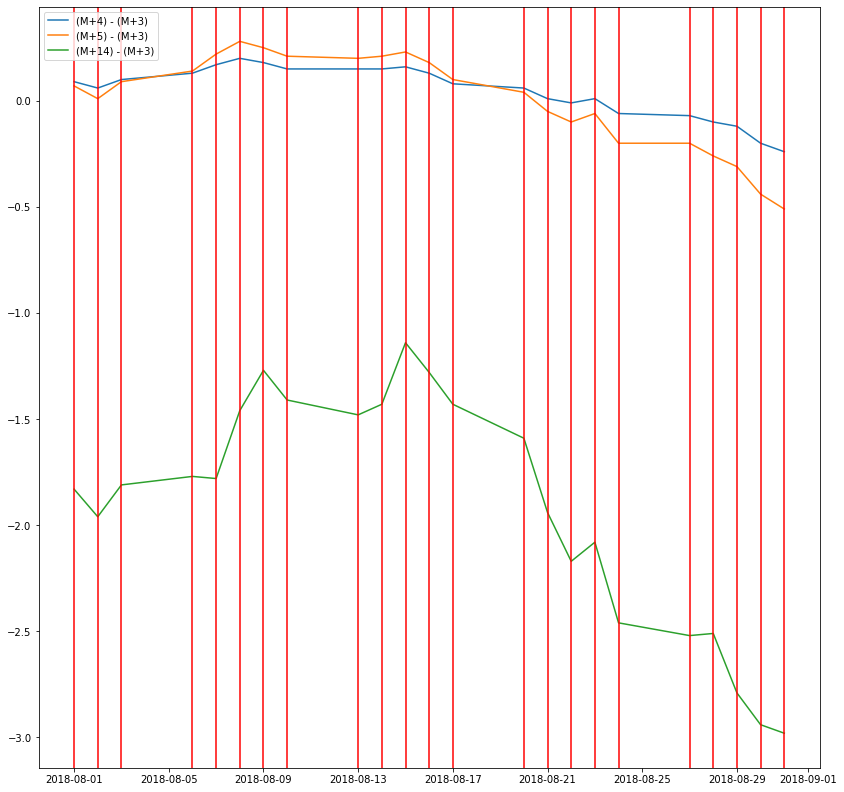

In [15]:
ax = plt.figure(figsize=(14, 14))
date = df2['Trade_Date']
ind1 = [df2['Trade_Date'][i].month==8 for i in range(np.size(date))]
ind2 = [df2['Trade_Date'][i].year==2018 for i in range(np.size(date))]
ind = np.logical_and(ind1,ind2)

plt.plot(df2['Trade_Date'][ind],diff[ind,0],label = "(M+4) - (M+3)")
plt.plot(df2['Trade_Date'][ind],diff[ind,1],label = '(M+5) - (M+3)')
plt.plot(df2['Trade_Date'][ind],diff[ind,10],label = '(M+14) - (M+3)')
plt.legend()

wh = np.where(ind==True)

for i in range(np.size(wh)):
    
    plt.axvline(pd.Timestamp(df2['Trade_Date'][wh[0][i]]),c='r')

In [16]:
X = np.column_stack((diff[ind,10],diff[ind,0]))
rs = st.grangercausalitytests(X,5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=15.5808 , p=0.0009  , df_denom=19, df_num=1
ssr based chi2 test:   chi2=18.0409 , p=0.0000  , df=1
likelihood ratio test: chi2=13.1749 , p=0.0003  , df=1
parameter F test:         F=15.5808 , p=0.0009  , df_denom=19, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=9.2374  , p=0.0022  , df_denom=16, df_num=2
ssr based chi2 test:   chi2=24.2482 , p=0.0000  , df=2
likelihood ratio test: chi2=16.1204 , p=0.0003  , df=2
parameter F test:         F=9.2374  , p=0.0022  , df_denom=16, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=7.6686  , p=0.0034  , df_denom=13, df_num=3
ssr based chi2 test:   chi2=35.3936 , p=0.0000  , df=3
likelihood ratio test: chi2=20.3746 , p=0.0001  , df=3
parameter F test:         F=7.6686  , p=0.0034  , df_denom=13, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=3.7630  , p=0.0406  , df_d

In [17]:
# negative splines
beta100_975 = (dff['Vol975'] - dff['Vol100']) / (97.5-100)
beta975_95 = (dff['Vol95'] - dff['Vol975']) / (95 - 97.5)
beta95_90 = (dff['Vol90'] - dff['Vol95']) / (90-95)
beta90_80 = (dff['Vol80'] - dff['Vol90']) / (80-90)

# negative line
beta100_80 = (dff['Vol80'] - dff['Vol100']) / (80-100)

# positive splines
beta100_1025 = (dff['Vol1025'] - dff['Vol100']) / (102.5-100)
beta1025_105 = (dff['Vol105'] - dff['Vol1025']) / (105-102)
beta105_110 = (dff['Vol110'] - dff['Vol105']) / (110-105)
beta110_120 = (dff['Vol120'] - dff['Vol110']) / (120-110)

# positive line
beta100_120 = (dff['Vol120'] - dff['Vol100']) / (120-100)

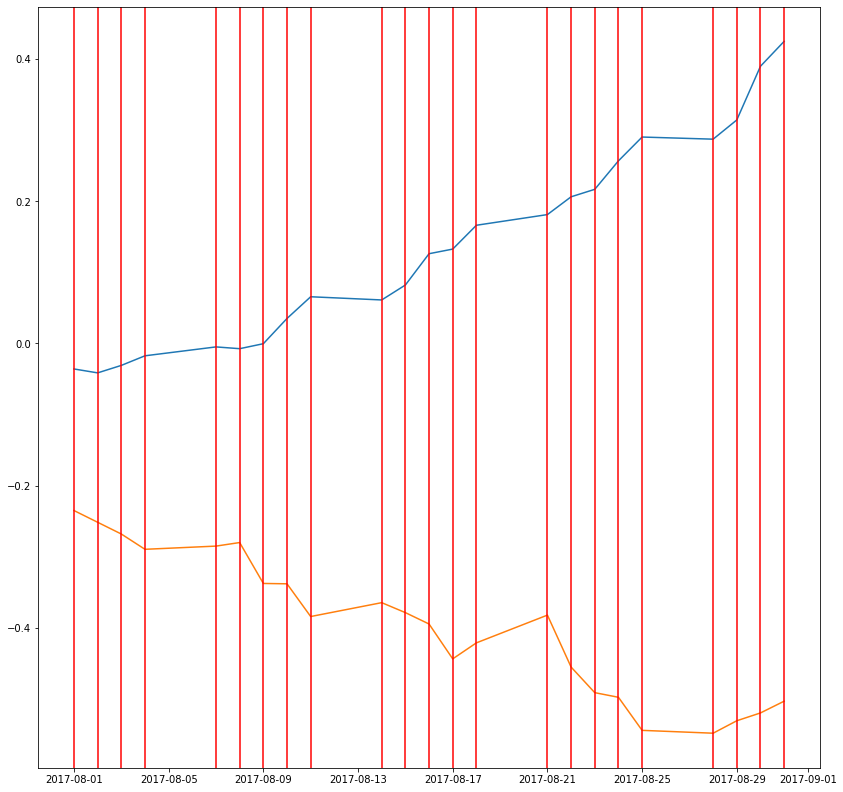

In [75]:
ax = plt.figure(figsize=(14, 14))
plt.plot(df2['Trade_Date'][ind],beta100_120[ind])
plt.plot(df2['Trade_Date'][ind],beta100_80[ind])
for i in range(np.size(wh)):
    
    plt.axvline(pd.Timestamp(df2['Trade_Date'][wh[0][i]]),c='r')

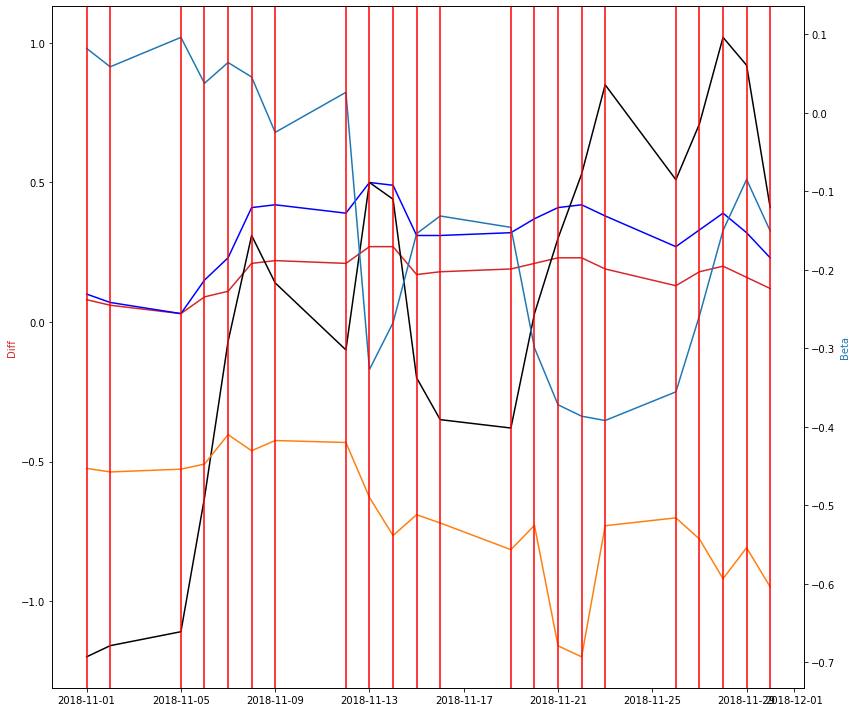

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 10))
ind1 = [df2['Trade_Date'][i].month==11 for i in range(np.size(date))]
ind2 = [df2['Trade_Date'][i].year==2018 for i in range(np.size(date))]
ind = np.logical_and(ind1,ind2)
wh = np.where(ind==True)
color = 'tab:red'
ax1.plot(df2['Trade_Date'][ind],diff[ind,0], color=color)
ax1.plot(df2['Trade_Date'][ind],diff[ind,1], color='b')
ax1.plot(df2['Trade_Date'][ind],diff[ind,10], color='k')
ax1.set_ylabel('Diff', color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(df2['Trade_Date'][ind],beta100_120[ind])
ax2.plot(df2['Trade_Date'][ind],beta100_80[ind])
ax2.set_ylabel('Beta', color=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
for i in range(np.size(wh)):
    
    plt.axvline(pd.Timestamp(df2['Trade_Date'][wh[0][i]]),c='r')
plt.show()

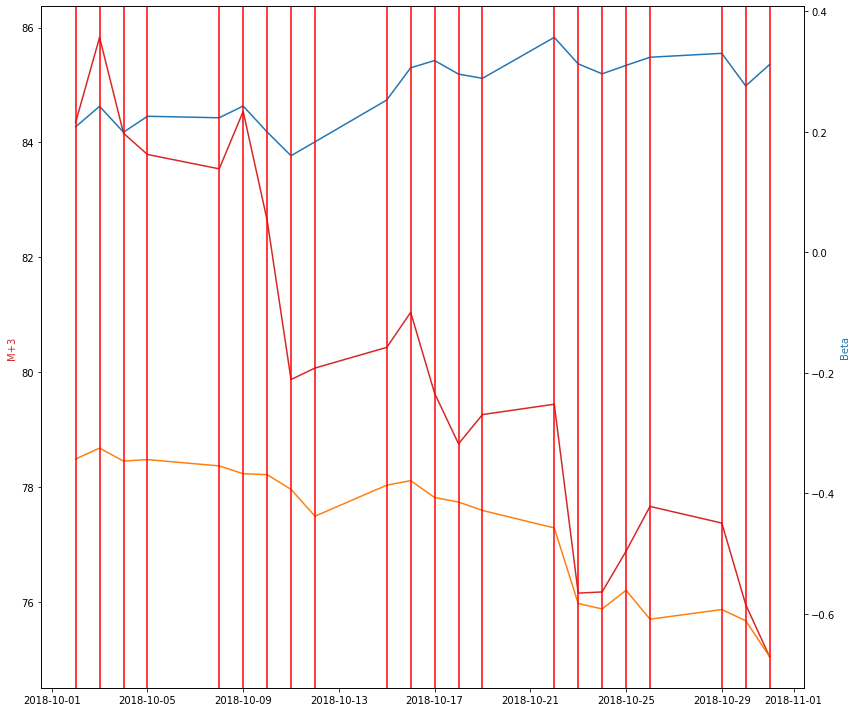

In [19]:
ind1 = [df2['Trade_Date'][i].month==10 for i in range(np.size(date))]
ind2 = [df2['Trade_Date'][i].year==2018 for i in range(np.size(date))]
ind = np.logical_and(ind1,ind2)
wh = np.where(ind==True)
fig, ax1 = plt.subplots(figsize=(12, 10))

color = 'tab:red'
ax1.plot(df2['Trade_Date'][ind],df2['M+3'][ind], color=color)
ax1.set_ylabel('M+3', color=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.plot(df2['Trade_Date'][ind],beta100_120[ind])
ax2.plot(df2['Trade_Date'][ind],beta100_80[ind])
ax2.set_ylabel('Beta', color=color)

fig.tight_layout()# otherwise the right y-label is slightly clipped
for i in range(np.size(wh)):
    
    plt.axvline(pd.Timestamp(df2['Trade_Date'][wh[0][i]]),c='r')
plt.show()